In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Matmul FLOP
#label = 'matmul'
#df = pd.read_csv('data/sac_find_best_matmul.csv')
#flop = df['size'] * df['size'] * (2 * df['size'] - 1)

# N-body FLOP
#label = 'n-body'
#df = pd.read_csv('data/sac_find_best_nbody.csv')
#flop = 20 * df['size'] * df['size'] + 12 * df['size']

# 9-point stencil FLOP
label = 'stencil'
df = pd.read_csv('data/sac_find_best_relax.csv')
flop = 17 * df['size'] * df['size']

df['GFLOP/J'] = (flop / 1e9) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']
df['GFLOP/J SD'] = 0 * df['energysd'] # How to compute this?

#df['energy'] -= df['runtime'] * 3.85

df

,pin,size,threads,runtime,runtimesd,energy,energysd,GFLOP/J,GFLOP/s,GFLOP/J SD
0,True,1000,1,0.005594,0.000235,0.088479,0.008380,0.192136,3.038791,0.0
1,True,1000,2,0.006201,0.000148,0.101696,0.011394,0.167165,2.741710,0.0
2,True,1000,3,0.004142,0.000095,0.079153,0.006618,0.214775,4.104783,0.0
3,True,1000,4,0.003105,0.000075,0.063080,0.006788,0.269498,5.475675,0.0
4,True,1000,5,0.002483,0.000063,0.057372,0.010819,0.296310,6.847798,0.0
...,...,...,...,...,...,...,...,...,...,...
123,False,25000,12,0.688772,0.016707,25.489031,0.791826,0.416846,15.425996,0.0
124,False,25000,13,0.635895,0.015543,25.909710,0.641094,0.410078,16.708733,0.0
125,False,25000,14,0.591696,0.014960,24.481907,0.652889,0.433994,17.956868,0.0
126,False,25000,15,0.585165,0.013120,26.426252,0.651281,0.402062,18.157284,0.0


In [41]:
def twin_plot(df, ax, bar_y, line_y, sd, bar_label=None, line_label=None, bar_min=True):
    if bar_label == None: bar_label = bar_y
    if line_label == None: line_label = line_y
    
    x = list(range(0, len(df)))
    
    sns.barplot(x=[x+1 for x in x], y=df[bar_y], label=bar_label, legend=False, ax=ax)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df[line_y], label=line_label, legend=False, color='r', ax=axt)

    ax.set_ylim((0,None))
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df[bar_y], yerr=df[sd], fmt='none', c='black')

    for bar in ax.patches:
        if ((bar_min and bar.get_height() == df[bar_y].min()) or
            (not bar_min and bar.get_height() == df[bar_y].max())):
            bar.set_color('g')
            break

    ax.set_ylabel(bar_label)
    axt.set_ylabel(line_label)

    return axt

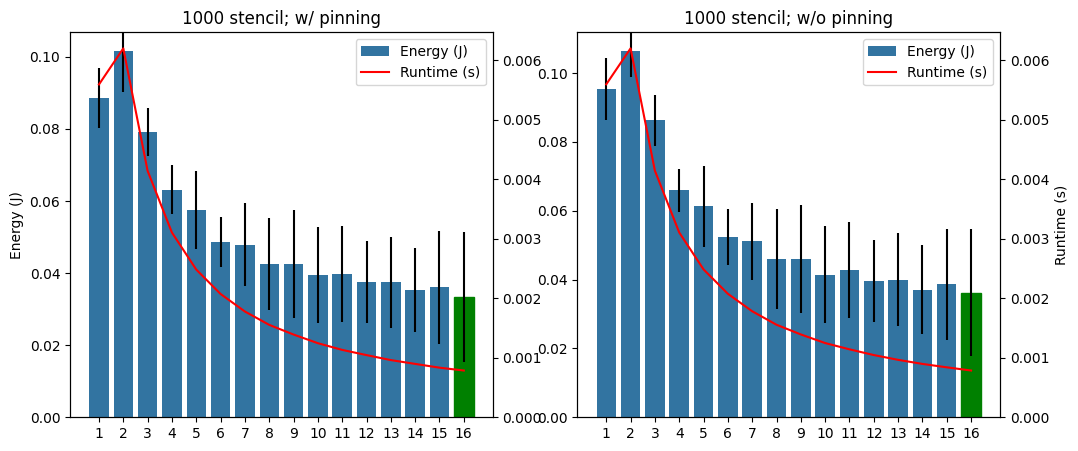

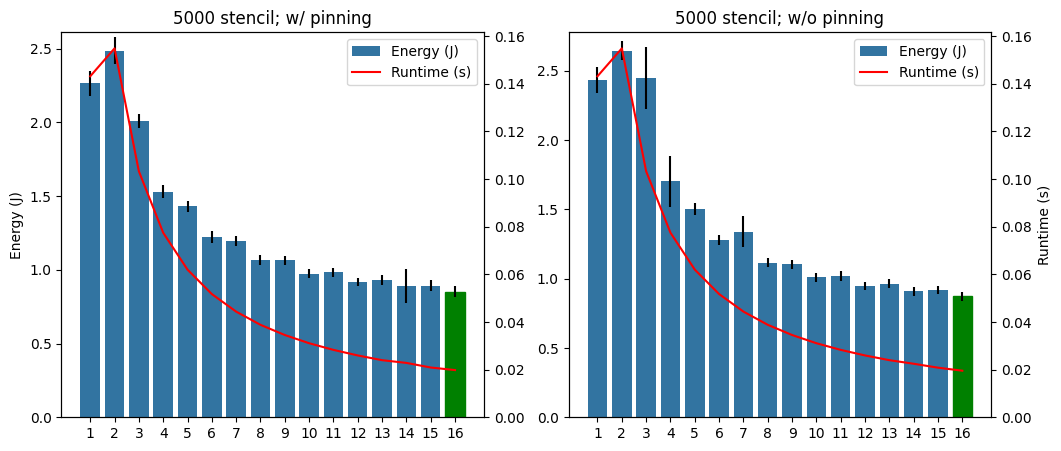

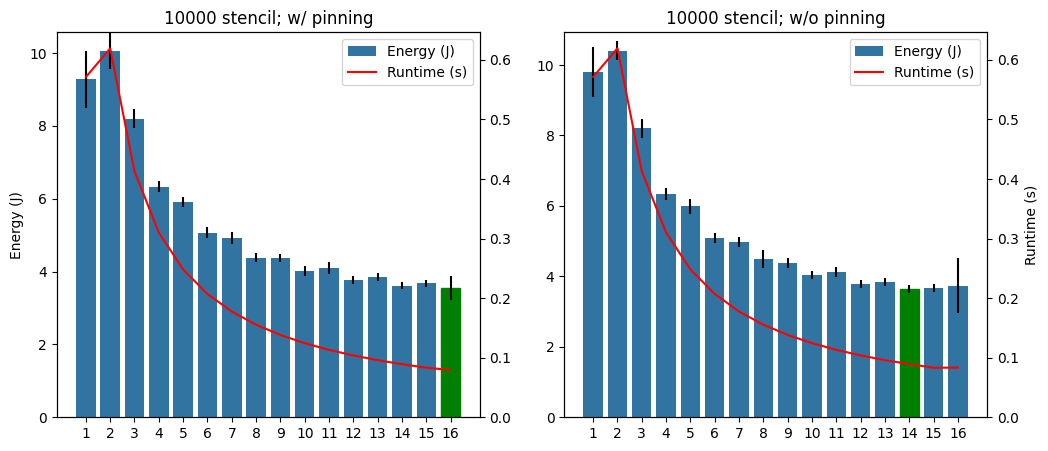

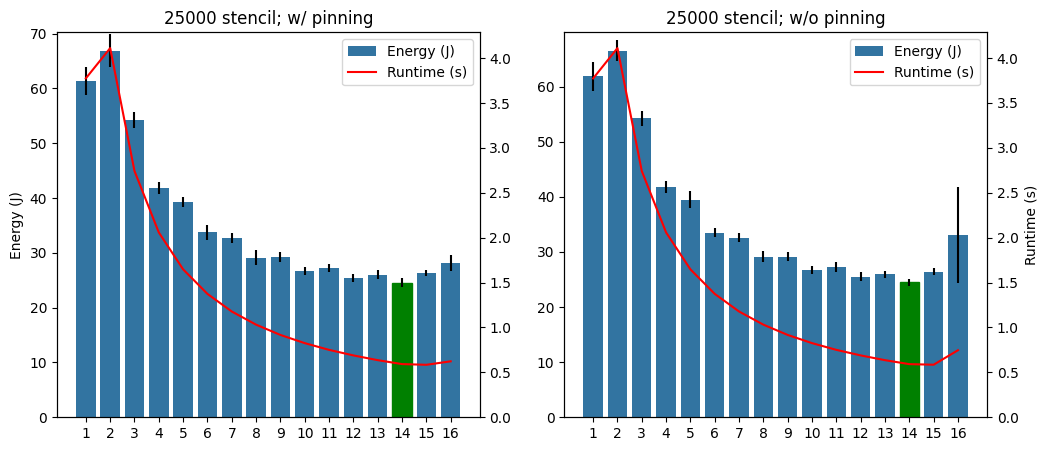

In [42]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    twin_plot(wo_pin, ax2, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size} {label}; w/ pinning')
    ax2.set_title(f'{size} {label}; w/o pinning')

plt.show()

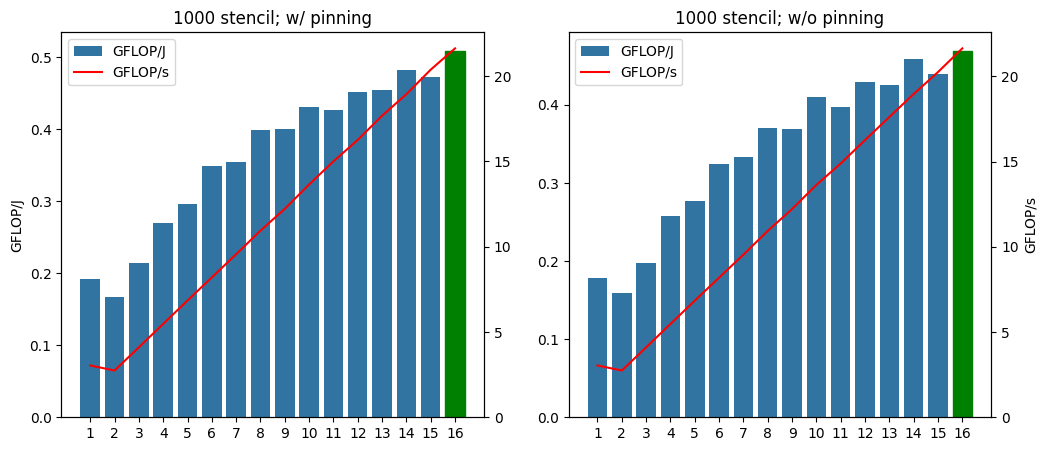

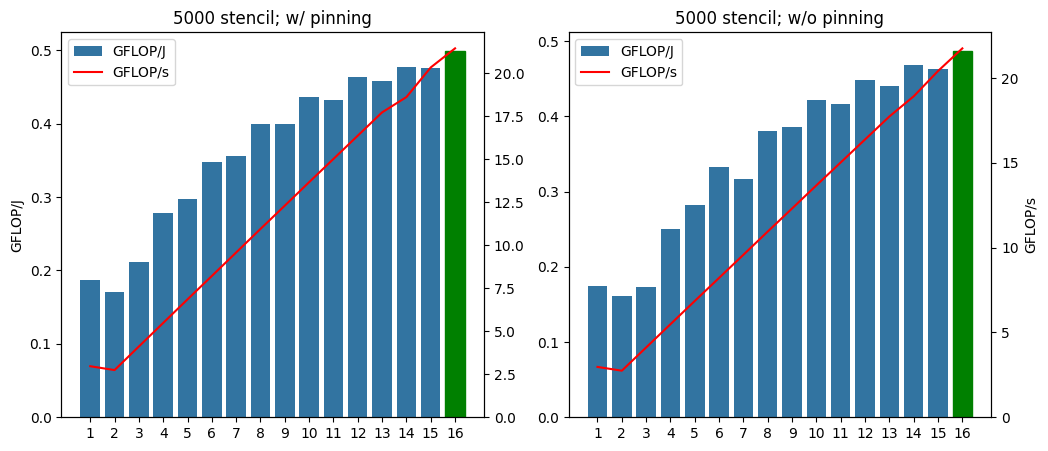

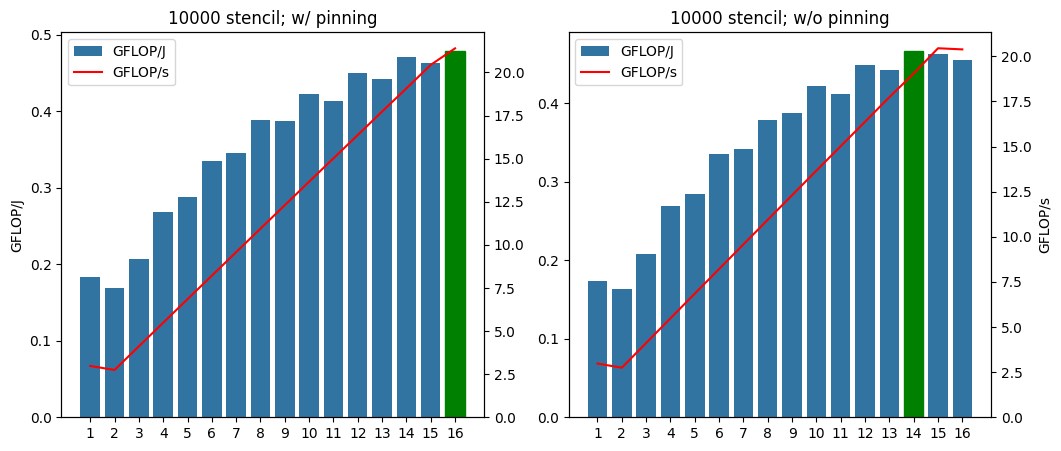

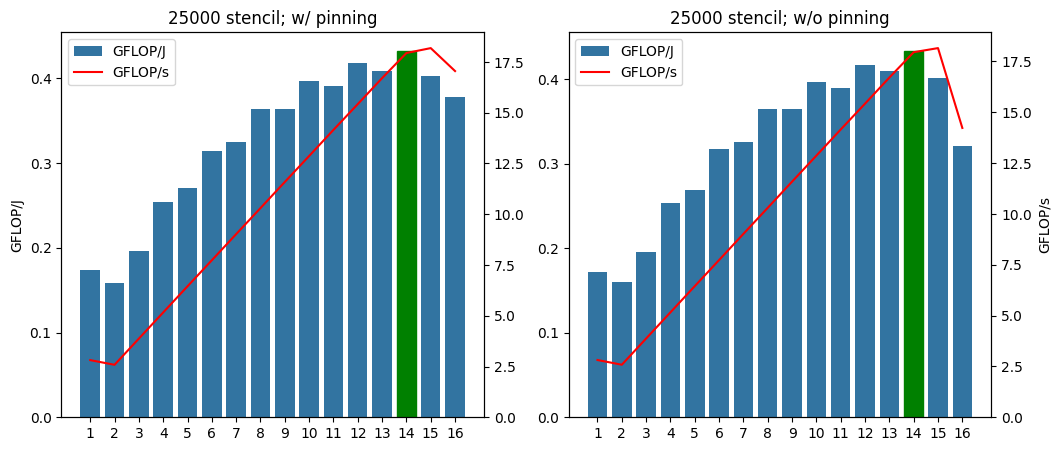

In [43]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    twin_plot(wo_pin, ax2, 'GFLOP/J', 'GFLOP/s', 'GFLOP/J SD', bar_min=False)
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size} {label}; w/ pinning')
    ax2.set_title(f'{size} {label}; w/o pinning')

plt.show()